# Importing supporting Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Importing dataset

In [5]:
df = pd.read_csv("C:\\Users\\pradeep\\Desktop\\dataset\\car.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Checking filesize

In [6]:
df.shape

(398, 9)

## Checking for null values

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Checking file info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


## Correlation 

In [9]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.777501,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842437,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897082,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.777501,0.842437,0.897082,1.000000,0.863990,-0.686436,-0.417081,-0.452386
weight,-0.831741,0.896017,0.932824,0.863990,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686436,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.417081,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452386,-0.581024,0.205873,0.180662,1.000000


## Correlation graph (Heatmap)

<AxesSubplot:>

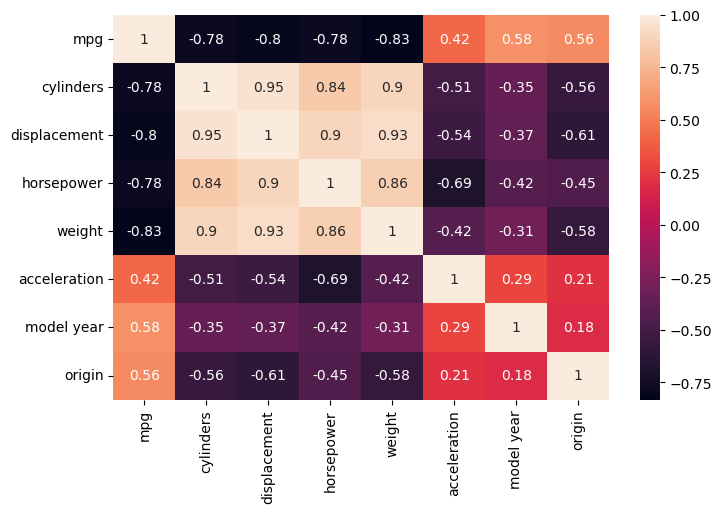

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

## Checking correlation of features with target

In [11]:
corre=df.corr().mpg
corre

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.777501
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

## Pairplot

- ### *Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.*

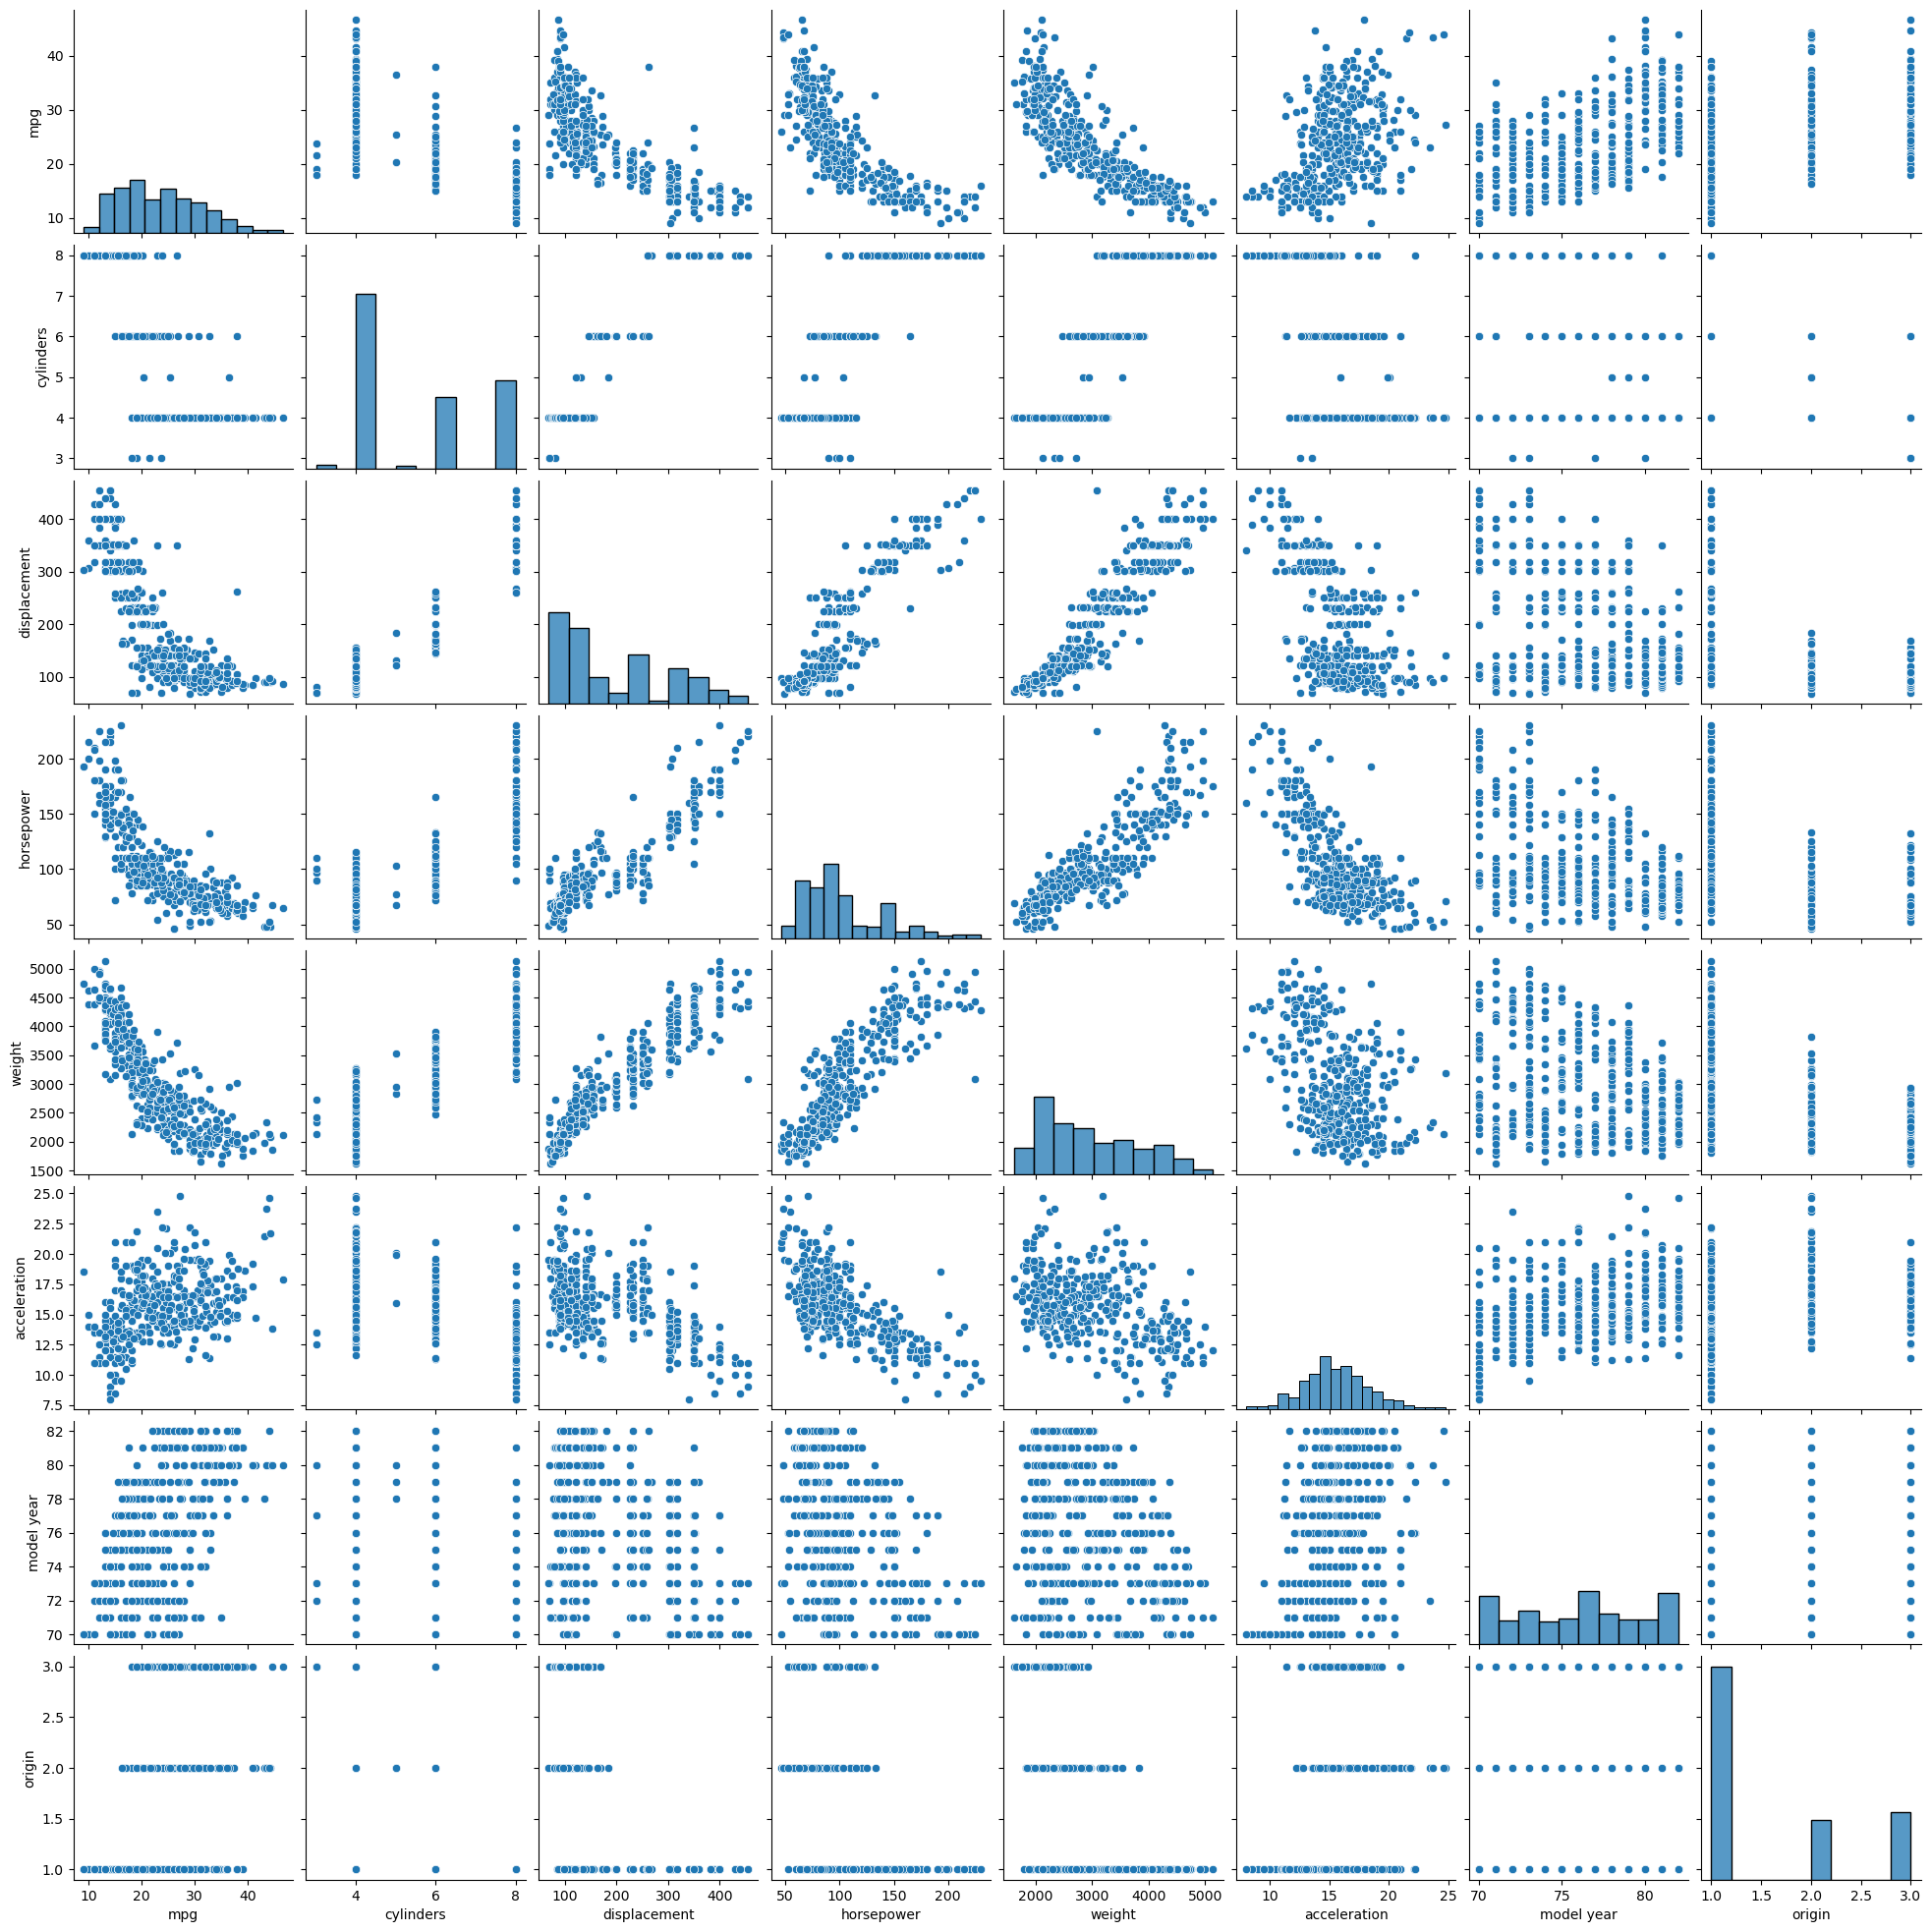

In [12]:
sns.pairplot(df)

## Removing car name column as it is noy considering for ML purpose

In [13]:
new_df=df.iloc[:,:-1]
new_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


## Renaming Model year as modelyear

In [14]:
df1= new_df.rename({'model year': 'modelyear'}, axis=1)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


## Splitting independant(X) & dependant variable(y)

In [15]:
X = df1.iloc[:,1:]
X.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


## Scaling 

In [16]:
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame (scale(X), columns=X.columns)
X_scaled.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,1.498191,1.090604,0.675394,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.590414,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.198262,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.198262,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.936828,0.565841,-1.840117,-1.627426,-0.715145


In [17]:
y = df1.mpg
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

## Train test split for ML 

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=1)

In [19]:
X_train.shape

(318, 7)

In [20]:
X_test.shape

(80, 7)

## 1.RandomForestRegressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
from sklearn.metrics import r2_score
y_predict1 = model1.predict(X_test)
rfr=r2_score(y_test, y_predict1)
rfr

0.90526089760313

## 2.LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [24]:
y_predict2 = model2.predict(X_test)
lr=r2_score(y_test, y_predict2)
lr

0.8637229150902623

## 4.GradientBoostingRegressor

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
model4=GradientBoostingRegressor()
model4.fit(X_train,y_train)

GradientBoostingRegressor()

In [28]:
y_predict4 = model4.predict(X_test)
gbr=r2_score(y_test, y_predict4)
gbr

0.9126687802629385

## Accuracy scores

In [30]:
#Accuracy Scores
score= [['GradientBoostingRegressor',gbr], ['RandomForestRegressor',rfr],
              ['LinearRegression',lr]]

vehicle_performance= pd.DataFrame(score, columns = ['Regression models', 'test_acc_scores'])
vehicle_performance

,Regression models,test_acc_scores
0,GradientBoostingRegressor,0.912669
1,RandomForestRegressor,0.905261
2,LinearRegression,0.863723


## Checking prediction using GBR

In [31]:
model4.predict([[8,307,130,3504,12,70,1]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([22.11017742])

In [32]:
GBR_performance= pd.DataFrame({'Actual':y_test,'Predict':y_predict4})
GBR_performance.head()

,Actual,Predict
174,18.0,20.342484
359,28.1,27.263191
250,19.4,17.107832
274,20.3,21.436367
283,20.2,21.244662


<AxesSubplot:xlabel='mpg'>

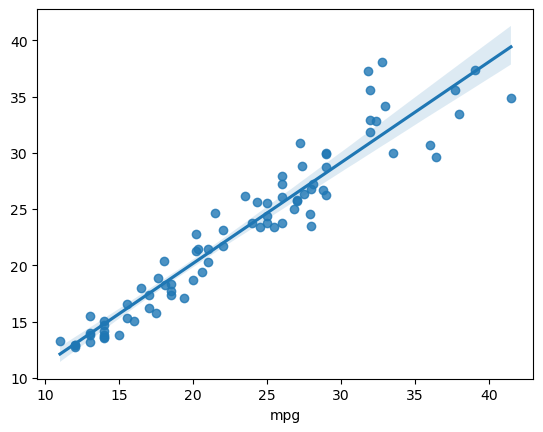

In [33]:
sns.regplot(x = y_test, y =y_predict4 )

## Deployment

- ### Considering gradient boosting regressor for deploy this problem as it is showing high accuracy among 4 models used.

## Saving the model

In [34]:
import joblib
joblib.dump(model4, 'gbr_performance.pkl')

['gbr_performance.pkl']